In [2]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [84]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values
Y = Y.reshape(len(Y), 1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


<IPython.core.display.Javascript object>

In [85]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

<IPython.core.display.Javascript object>

In [78]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


<IPython.core.display.Javascript object>

In [79]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<IPython.core.display.Javascript object>

In [86]:
from sklearn.svm import SVR

regressor = SVR(kernel="rbf")
regressor.fit(X, Y.ravel())

SVR()

<IPython.core.display.Javascript object>

In [91]:
def get_prediction(x):
    scaled_pred_X = np.array(regressor.predict(sc_X.transform(x))).reshape(len(x), 1)
    return sc_Y.inverse_transform(scaled_pred_X)

<IPython.core.display.Javascript object>

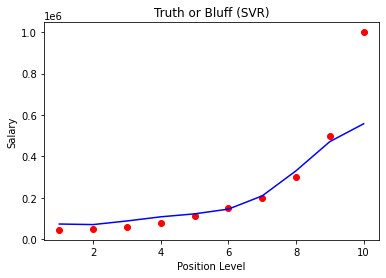

<IPython.core.display.Javascript object>

In [96]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color="red")
plt.plot(
    sc_X.inverse_transform(X), get_prediction(sc_X.inverse_transform(X)), color="blue"
)
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

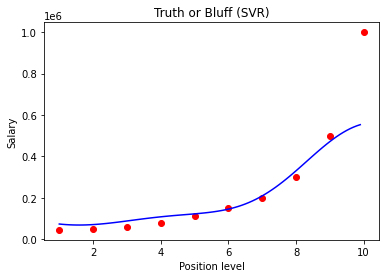

<IPython.core.display.Javascript object>

In [98]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color="red")
plt.plot(
    X_grid,
    get_prediction(X_grid),
    color="blue",
)
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()